In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, let's recreate our IQ example of a normal distribution with a mean of 100 and standard deviation of 15.

Text(0.5, 0.92, 'Distribution of IQ Among the Population')

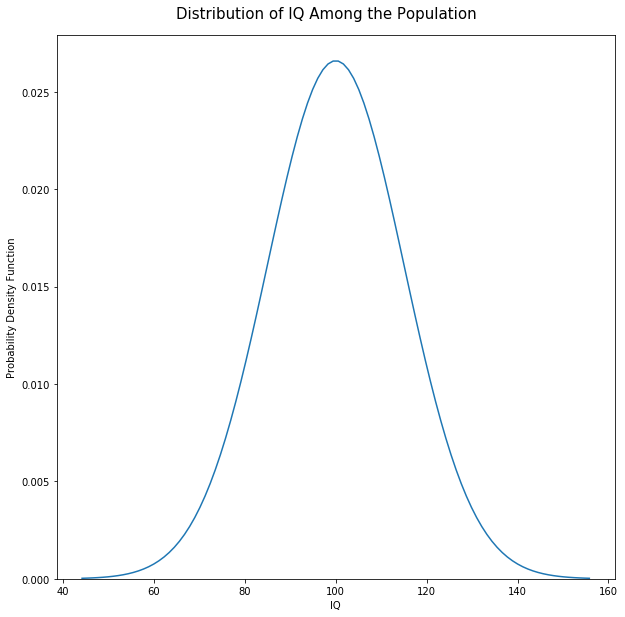

In [5]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Population', fontsize=15, y=0.92)

In [7]:
#Mean
dist.mean()

100.0

In [8]:
#Standard Deviation
dist.std()

15.0

In [10]:
#97.5th Percentile
dist.ppf(0.975)

129.39945976810083

In [11]:
#2.5th Percentile
dist.ppf(0.025)

70.60054023189917

Now, as per the problem in class, we want to see what the distribution of the mean IQ of nine random people sampled from the population is. To do that, we'll take the previous distribution, and divide the standard deviation by the square root of nine.

Text(0.5, 0.92, 'Distribution of IQ Among the Sample Population')

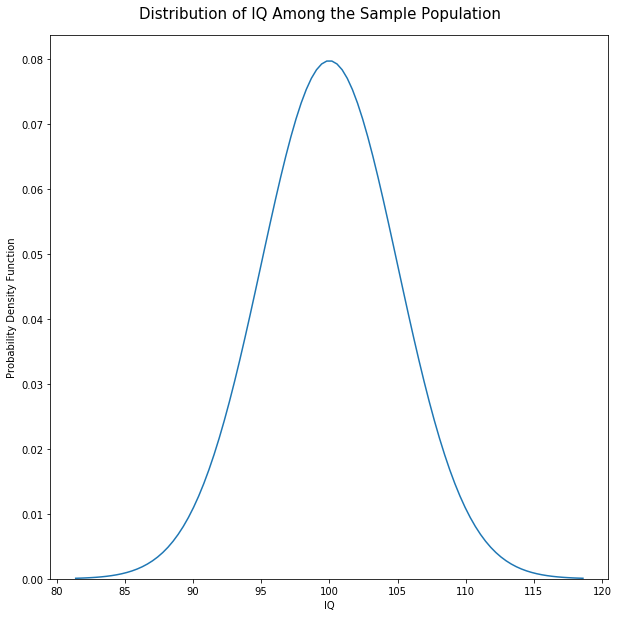

In [53]:
fig = plt.figure(figsize=(10,10))
dist = stats.norm(loc=100, scale=15/np.sqrt(9))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Sample Population', fontsize=15, y=0.92)

In [13]:
#Mean
dist.mean()

100.0

In [14]:
#Standard Deviation
dist.std()

5.0

In [15]:
#97.5th Percentile
dist.ppf(0.975)

109.79981992270027

In [16]:
#92.5th Percentile
dist.ppf(0.025)

90.20018007729973

### Creating a Rejection Region

In lecture, we talked about a few of the levers we could pull as far as how we set up our test and created our rejection regions.

1) Changing the number of people we poll  
    As we see above, our sample of nine people has a smaller standard deviation than that of the general population. This standard deviation will get smaller as we increase our sample size. Let's leave this at nine for now.  

2) Changing between a one-sided and two-sided test  

3) Changing our significance level  


Let's first establish a p-value of 0.05 in a two-sided test. In this case, our rejection regions will be at the 2.5 and 97.5 percentiles.

In [18]:
#2.5th Percentile
dist.ppf(0.025)

90.20018007729973

In [17]:
#97.5th Percentile
dist.ppf(0.975)

109.79981992270027

Thus, if our sample has a mean IQ less than 90.2 or greater than 109.79, we can reject the null hypothesis that CCNY students have the same IQ as the general population.

If we want to do a one-sided test, we could test whether CCNY students have a *greater* IQ than the mean population. If we keep a p-value of 0.05, our rejection region will then be at the 95th percentile.

In [19]:
#95th Percentile
dist.ppf(0.95)

108.22426813475737

We could also do a one-sided test to test whether CCNY students have a *lower* IQ than the mean population. If we keep a p-value of 0.05, our rejection region will then be at the 5th percentile.

In [20]:
#95th Percentile
dist.ppf(0.05)

91.77573186524263

Or, we could change our p-value to 0.01. In this case, our rejection regions for a *two-sided test* will be at the 0.5 and 99.5 percentiles.

In [23]:
#0.5th Percentile
dist.ppf(0.005)

87.1208534822555

In [24]:
#99.5th Percentile
dist.ppf(0.995)

112.8791465177445

If we want to do a one-sided test, we could test whether CCNY students have a greater IQ than the mean population. If we keep a p-value of 0.01, our rejection region will then be at the 99th percentile.

In [25]:
#99th Percentile
dist.ppf(0.99)

111.6317393702042

We could also do a one-sided test to test whether CCNY students have a lower IQ than the mean population. If we keep a p-value of 0.01, our rejection region will then be at the 1st percentile.

In [26]:
#1st Percentile
dist.ppf(0.01)

88.3682606297958

### Hypothesis Test

Let's use the sample of nine students we found in class.

In [32]:
samples = [112, 94, 116, 140, 91, 91, 142, 119, 85]

In [33]:
np.mean(samples)

110.0

This has a mean of 110, which is in the 97.7th percentile of the sample distribution.

In [34]:
dist.cdf(np.mean(samples))

0.9772498680518208

Depending on the test that we have set up, we'll reject or fail to reject our null hypothesis.

In [36]:
#Two-Sided Test, p-value 0.05
print('Rejection Region: less than', dist.ppf(0.025))
print('Rejection Region: greater than', dist.ppf(0.975))

Rejection Region: less than 90.20018007729973
Rejection Region: greater than 109.79981992270027


In [40]:
#Two-Sided Test, p-value 0.01
print('Rejection Region: less than', dist.ppf(0.005))
print('Rejection Region: greater than', dist.ppf(0.995))

Rejection Region: less than 87.1208534822555
Rejection Region: greater than 112.8791465177445


We can find the **p-value** of our sample result for a two-sided test by getting the inverse CDF of our result and dividing it by 2 (if the result was less than the population mean, we would get the CDF rather than the inverse CDF).

In [38]:
#P-Value of Our Result in a Two-Sided Test
(1 - dist.cdf(np.mean(samples))) / 2

0.011375065974089604

In [43]:
#One-Sided Test, p-value 0.05
print('Rejection Region: greater than', dist.ppf(0.95))

Rejection Region: greater than 100.0


In [42]:
#One-Sided Test, p-value 0.01
print('Rejection Region: greater than', dist.ppf(0.99))

Rejection Region: greater than 111.6317393702042


We can find the **p-value** of our sample result for a two-sided test by getting the inverse CDF of our result (if the result was less than the population mean, we would get the CDF rather than the inverse CDF).

In [41]:
#P-Value of Our Result in a One-Sided Test
(1 - dist.cdf(np.mean(samples)))

0.02275013194817921

### T-Test

Before, we knew that the population had a standard deviation of 15. But what if we didn't know this? We could use our sample to estimate the standard deviation of the population.

Let's first find standard deviation of the population manually.

In [47]:
total_variance = 0
for i in samples:
    deviation = i - np.mean(samples)
    squared_deviation = np.power(deviation, 2)
    total_variance += squared_deviation
print(np.sqrt(total_variance/len(samples)))

20.132891827388665


In [44]:
np.std(samples)

20.132891827388665

Of course, for a sample, we'll find the sample standard deviation rather than the population standard deviation. This requires us dividing by the length of the samples **minus 1**.

In [50]:
total_variance = 0
for i in samples:
    deviation = i - np.mean(samples)
    squared_deviation = np.power(deviation, 2)
    total_variance += squared_deviation
print(np.sqrt(total_variance/(len(samples) - 1)))

21.354156504062622


We can do this with Numpy by finding the standard deviation and adding the 'delta degrees of freedom (ddof)' argument to 1.

In [52]:
np.std(samples, ddof=1)

21.354156504062622

We can now make a T-distribution with the following inputs:  
* loc (mean) = 100  
* scale (std) = 21.35 / np.sqrt(9)  
* df = 8 (number of samples minus 1)

In [55]:
dist = stats.t(loc=100, scale=np.std(samples, ddof=1)/np.sqrt(9), df=8)

Text(0.5, 0.92, 'Distribution of IQ Among the Sample Population')

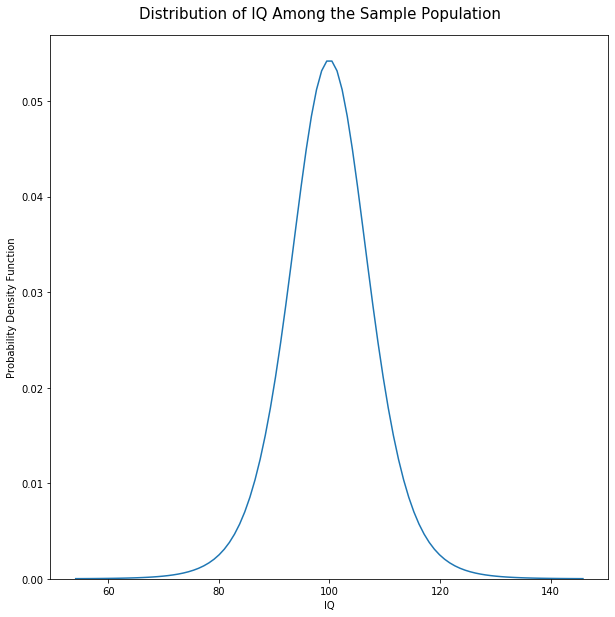

In [56]:
fig = plt.figure(figsize=(10,10))
dist = stats.t(loc=100, scale=np.std(samples, ddof=1)/np.sqrt(9), df=8)
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
plt.ylim(bottom=0)
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ Among the Sample Population', fontsize=15, y=0.92)

Depending on the test that we have set up, we'll reject or fail to reject our null hypothesis.

In [57]:
#Two-Sided Test, p-value 0.05
print('Rejection Region: less than', dist.ppf(0.025))
print('Rejection Region: greater than', dist.ppf(0.975))

Rejection Region: less than 83.58574226716061
Rejection Region: greater than 116.41425773283939


In [58]:
#Two-Sided Test, p-value 0.01
print('Rejection Region: less than', dist.ppf(0.005))
print('Rejection Region: greater than', dist.ppf(0.995))

Rejection Region: less than 76.11617793165254
Rejection Region: greater than 123.88382206834746


In [63]:
#P-Value of Our Result in a Two-Sided Test
(1 - dist.cdf(np.mean(samples))) / 2

0.04941905447751421

We can find the p-value of our sample result for a two-sided test by getting the inverse CDF of our result and dividing it by 2 (if the result was less than the population mean, we would get the CDF rather than the inverse CDF).

In [61]:
#One-Sided Test, p-value 0.05
print('Rejection Region: greater than', dist.ppf(0.95))

Rejection Region: greater than 113.23635994002844


In [62]:
#One-Sided Test, p-value 0.01
print('Rejection Region: greater than', dist.ppf(0.99))

Rejection Region: greater than 120.61714941612607


In [59]:
#P-Value of Our Result in a One-Sided Test
(1 - dist.cdf(np.mean(samples)))

0.09883810895502843

### Graph Reference

Use the below as a reference if you want to make a graph with rejection regions.

Text(0.5, 0.92, 'Distribution of IQ in T-Sample (df = 8)')

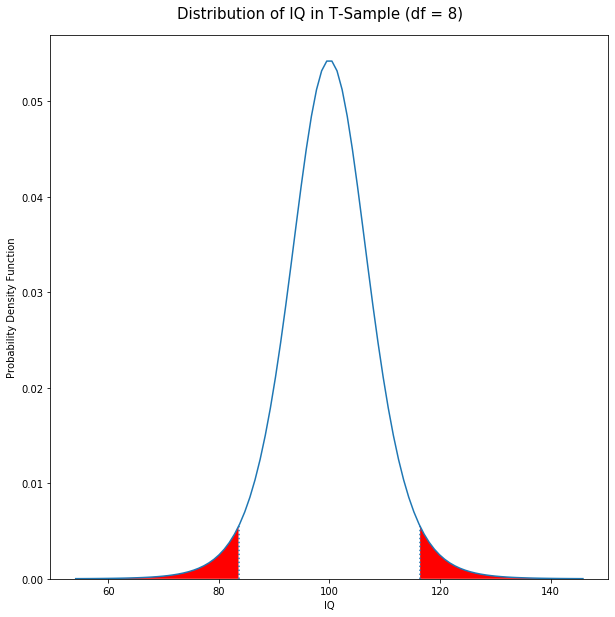

In [65]:
#Plot a PDF Graph with Mean 100 and standard deviation of 5 (based on the survey population of 9)
dist = stats.t(loc=100, scale=np.std(samples, ddof=1)/np.sqrt(9), df=8)
fig = plt.figure(figsize=(10,10))
x = np.linspace(dist.ppf(0.0001), dist.ppf(0.9999), 100)
plt.plot(x, dist.pdf(x))
#Create dotted line at 2.5th percentile here
plt.plot([dist.ppf(0.025), dist.ppf(0.025)],[0, dist.pdf(dist.ppf(0.025))], linestyle='dotted', color='#1f77b4')
#Fill in Region between 0 and 2.5th percentile here
X_fill = np.linspace(dist.ppf(0.0001), dist.ppf(0.025))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
#Create dotted line at 97.5th percentile here
plt.plot([dist.ppf(0.975), dist.ppf(0.975)],[0, dist.pdf(dist.ppf(0.975))], linestyle='dotted', color='#1f77b4')
#Fill in Region between 97.5th and 100h percentile here
X_fill = np.linspace(dist.ppf(0.975), dist.ppf(0.9999))
Y = dist.pdf(X_fill)
plt.fill_between(X_fill, 0, Y, facecolor='red')
plt.ylim(bottom=0)
plt.xlabel('IQ')
plt.ylabel('Probability Density Function')
fig.suptitle('Distribution of IQ in T-Sample (df = 8)', fontsize=15, y=0.92)